In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **LOGISTIC REGRESSION**

In [2]:
data = pd.read_csv("ex2data1.txt", header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
X = data.values[:, :-1]
y = data.values[:, -1]

In [5]:
pos, neg = (y==1).reshape(100, 1), (y==0).reshape(100, 1)

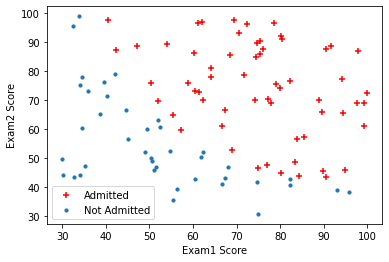

In [6]:
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1], c='r', marker='+', label="Admitted")
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], marker='o', label="Not Admitted", s=10)
plt.xlabel("Exam1 Score")
plt.ylabel("Exam2 Score")
plt.legend(loc=0)

**SIGMOID FUNCTION**

$ g(z) = \frac{1}{(1+e^{-z})}$


In [7]:
# from scipy.special import expit
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
#     return expit(z)

In [8]:
print(sigmoid(0))
print(sigmoid(10))
print(sigmoid(1))

0.5
0.9999546021312976
0.7310585786300049


**COST FUNCTION**

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$


In [9]:
def Costfunction(X, y, theta):
    m=len(y)
    
    h_theta = sigmoid(X@theta)
    y_pos = -y.T @ np.log(h_theta) #y_pos = (-y * np.log(predictions)) 
    y_neg = (1-y).T @ np.log(1-h_theta) #y_neg = ((1-y)*np.log(1-predictions))
    error = y_pos - y_neg #error = y_pos - y_neg *This gives array of values as output*
    
    cost = 1/m * sum(error)
    grad = 1/m * (X.T@(h_theta - y))
    
    return cost[0] , grad

**FEATURE SCALING**

In [10]:
def featureNormalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_Norm = (X - mu)/sigma
    return X_Norm, mu, sigma

In [11]:
m, n = X.shape
X, mu, sigma = featureNormalization(X)
X = np.column_stack((np.ones((m, 1)), X))
y = y.reshape(m, 1)
initial_theta = np.zeros((n+1, 1))
cost, grad= Costfunction(X, y, initial_theta)
print("Cost of initial theta is", cost)
print("Gradient at initial theta (zeros):", grad)

Cost of initial theta is 0.6931471805599453
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


**GRADIENT DESCENT**

In [12]:
def gradientDescent(X, y, theta, alpha, n_iters):
    m=len(y)
    J_history =[]
    
    for i in range(n_iters):
        cost, grad = Costfunction(X, y, theta)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    return theta, J_history

In [13]:
theta, J_history = gradientDescent(X=X, y=y, theta=initial_theta, alpha=1, n_iters=400)

**Plotting the decision boundary**

From Machine Learning Resources:

$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1"

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$


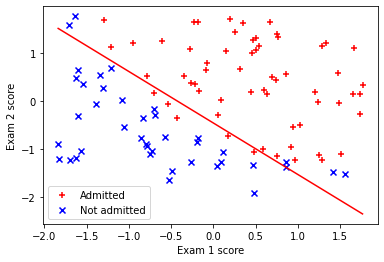

In [14]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value = np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value = -(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

**PREDICTIONS**

In [15]:
x_sample = np.array([45, 85])
x_sample = featureNormalization(x_sample)[0]
x_sample = np.append(np.ones(1), x_sample)
prob = sigmoid(x_sample.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of ",prob[0])

For a student with scores 45 and 85, we predict an admission probability of  0.8015327860552117


In [16]:
def predict(X, theta):
    p = sigmoid(X@theta) >= 0.37#select your own threshold
    return p

**ACCURACY**

In [17]:
p=predict(X,theta)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 92 %
